In [88]:
###PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import date, timedelta,datetime

# Load the data into a pandas dataframe
data = pd.read_csv('asianfx1.csv',parse_dates=['Date'])
data
# Preprocess the data
# Check for missing values and apply any necessary transformations
datafx=data[['Date','USDMYR','USDKRW','USDTWD','USDSGD','USDCNH','USDINR','USDTHB','USDIDR','USDPHP']]

datafx.set_index=['Date']

datafx=datafx.dropna()

In [89]:
## set date parameter   ###!!!!did not implement successfully
#start_date = '2019-01-02'
#end_date = '2022-03-03'
#datafxwithdate = datafx.loc[start_date:end_date]
#datafxwithdate

In [92]:


#log_returns = datafx.apply(lambda x: np.log(x) - np.log(x.shift(1)))
columns = ['USDMYR','USDKRW','USDTWD','USDSGD','USDCNH','USDINR','USDTHB','USDIDR','USDPHP']

for col in columns:
    datafx[f'{col}_LOG'] = np.log(datafx[col]) - np.log(datafx[col].shift(1))
datafx.columns

Index(['Date', 'USDMYR', 'USDKRW', 'USDTWD', 'USDSGD', 'USDCNH', 'USDINR',
       'USDTHB', 'USDIDR', 'USDPHP', 'USDMYR_LOG', 'USDKRW_LOG', 'USDTWD_LOG',
       'USDSGD_LOG', 'USDCNH_LOG', 'USDINR_LOG', 'USDTHB_LOG', 'USDIDR_LOG',
       'USDPHP_LOG'],
      dtype='object')

<AxesSubplot:>

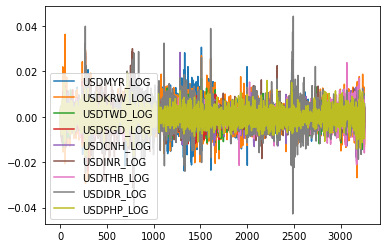

In [93]:
pca = PCA()
fx_log=datafx[['USDMYR_LOG', 'USDKRW_LOG','USDTWD_LOG', 'USDSGD_LOG', 'USDCNH_LOG', 'USDINR_LOG', 'USDTHB_LOG','USDIDR_LOG', 'USDPHP_LOG']]
fx_log=fx_log.dropna()
fx_log.plot()


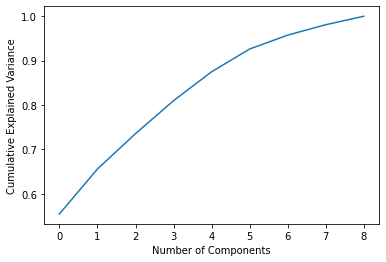

IndexError: index 9 is out of bounds for axis 1 with size 9

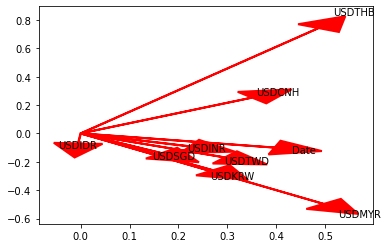

In [94]:
pca = PCA()
pca.fit(fx_log)

# Visualize the results using a scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Visualize the results using a biplot
fig, ax = plt.subplots()
for i in range(len(datafx.columns)):
    ax.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    ax.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15, data.columns[i], color='black', ha='center', va='center')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()